<a href="https://colab.research.google.com/github/manjirikulkarni03/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/INDIVIDUAL_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Unsupervised Classification


# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string,unicodedata
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [52]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [53]:
# Dataset Rows & Columns count
print(f"Netflix content Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Netflix content Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [54]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [55]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


Its good to see that we do not have any duplicated observations in our dataset.

#### Missing Values/Null Values

In [56]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [57]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


<Axes: >

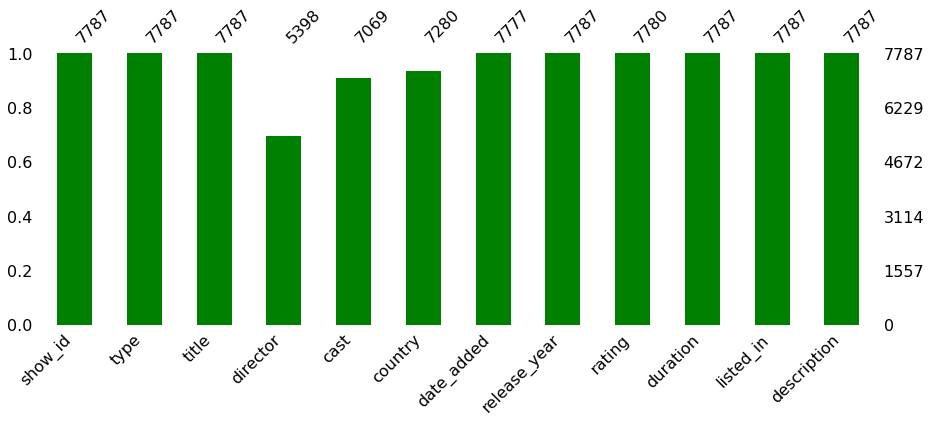

In [58]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="green")

### What did you know about your dataset?

We get to know the following points about our dataset:
1. The dataset contains 7787 rows and 12 columns.
2. The dataset don't have any duplicated observations.
3. All features are object type except release_year.
4. The null values present in 'director', 'cast', 'country', 'date_added' and 'ratting' features with the percentage of 30.7%, 9.2%, 6.5%, 0.1%, 0.1% respectively.

## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [60]:
#basic description
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

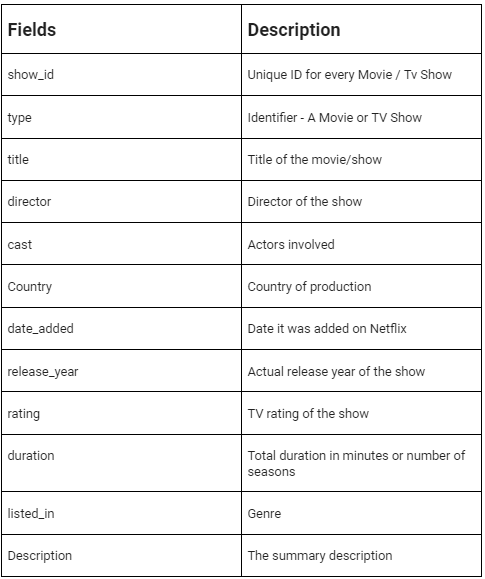

### Check Unique Values for each variable.

In [61]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


##***3. Data Wrangling***

### Data Wrangling Code

In [62]:
#creating copy of dataset
netflix=df.copy()

In [63]:
# Handling the missing values
#netflix.fillna('Unknown',inplace=True)
#netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])


In [64]:
#creating new dataframe without observations having date_added feature as 'Unknown'
#new_df=netflix[netflix['date_added']!='Unknown']

In [65]:
#changing dtype of date_added to datetime
#new_df['date_added']=pd.to_datetime(new_df['date_added'])


In [66]:
#extracting new feature like year and month and date from date_added
# new_df['day_added'] = new_df['date_added'].dt.day            
# new_df['year_added'] = new_df['date_added'].dt.year          
# new_df['month_added'] = new_df['date_added'].dt.month

In [67]:
#dropping date_added feature as we have extracted new features from it
# new_df.drop(['date_added'],axis=1,inplace=True)

In [68]:
# Choosing the lead cast,director and country to simplify the analysis
# new_df['country'] = new_df['country'].apply(lambda x: x.split(',')[0])
# new_df['cast'] = new_df['cast'].apply(lambda x: x.split(',')[0])
# new_df['director'] = new_df['director'].apply(lambda x: x.split(',')[0])

We have successfully handled all null values from our dataset.

### What all manipulations have you done and insights you found?

1. We have replaced null values from director, cast and country as 'unknown' they are containing high amount of outliers.
2. The missing values in rating had imputed with its mode, since this attribute is discrete.
3. As there are only 10 records having date_added as missing value. so we have dropped them.
4. Changed dtype of date_added with datetime and extracted two new features as date_added_month and date_added_year.
5. Splitted duration column and changed its dtype to int.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1 (Distribution of TV Show and movie)*

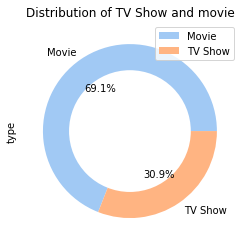

In [69]:
#Setting labels for items in Chart
type = netflix["type"].value_counts()

#Pie Chart
netflix["type"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
#draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

#Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Distribution of TV Show and movie')

#Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted donut chart to visualize the distribution of TV Show and movie.This type of chart can help to compare individual categories or dimensions to the larger whole, just like a pie chart, but with a couple of advantages. Donut charts can make it easier for us to compare individual dimensions.

##### 2. What is/are the insight(s) found from the chart?

As we can see number of TV Shows are approx 70% while movies are approx 31%.Netflix stream more TV Shows than movies.

#### Chart - 4 (Shows released and added on netflix each year)*

Text(0.5, 1.0, 'distribution by released year')

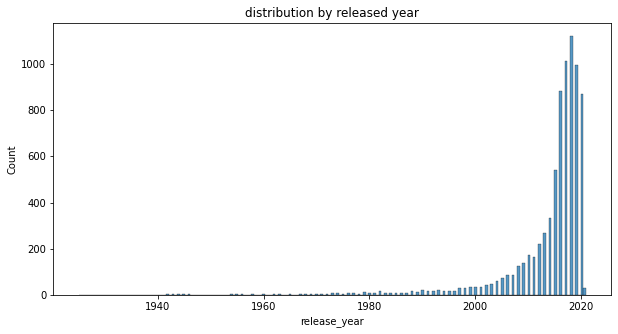

In [70]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(netflix['release_year'])
plt.title('distribution by released year')



##### 1. Why did you pick the specific chart?

We have choosed histogram to check in which month and year more shows/movies are released and added on netflix.Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Netflix has greater number of new movies / TV shows than the old ones.Even we can state from the graph that number of movie's releasing and getting added on Netflix has been increased since 2000 and the graph exceeded in large amount afterwards.Decrease in the number of shows released/added in the year 2020, might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.














#### Chart - 4 (Word cloud for title)*

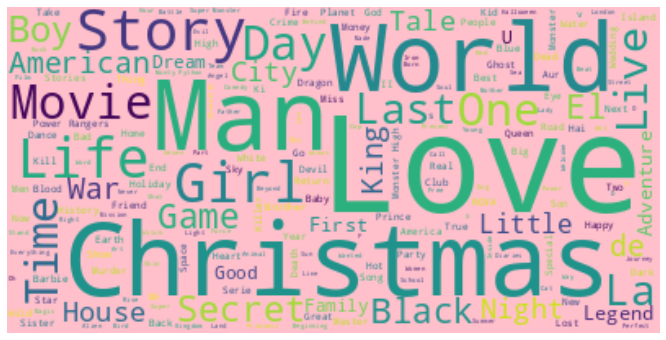

In [71]:
# Word cloud for title
title_word_cloud = netflix['title']
text_title = " ".join(word for word in title_word_cloud)
stopwords = set(STOPWORDS)
wordcloud_title = WordCloud(stopwords = stopwords, background_color="pink").generate(text_title)
plt.rcParams["figure.figsize"] = (14,6)
plt.imshow(wordcloud_title, interpolation = 'bilinear')
plt.axis("off")
plt.show()



##### 1. Why did you pick the specific chart?

We have choosed histogram to check in which month and year more shows/movies are released and added on netflix.Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Netflix has greater number of new movies / TV shows than the old ones.Even we can state from the graph that number of movie's releasing and getting added on Netflix has been increased since 2000 and the graph exceeded in large amount afterwards.Decrease in the number of shows released/added in the year 2020, might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.














### Bivariate Analysis

#### Chart - 3 (Top 10 Ratings given to movies and TV shows)*

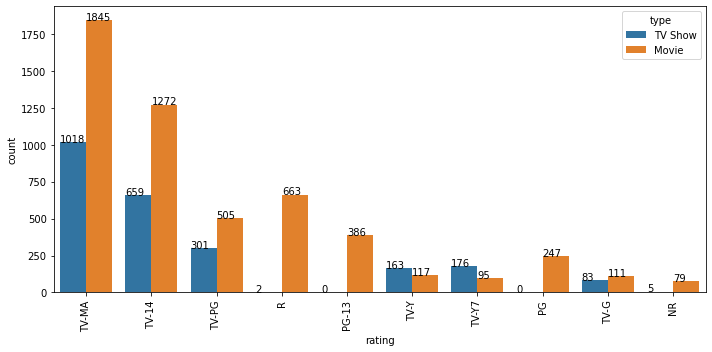

In [72]:
# Top 10 Ratings given to movies and TV shows
plt.figure(figsize=(10,5))
graph = sns.countplot(x="rating", data=netflix, hue='type', order=netflix['rating'].value_counts().index[0:10])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts are useful to compare different categorical or discrete variables.With the help of above charts we can get to know top directors from movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we got to know that Alastair Fothergill has directed most of the TV Shows while Raul Campos and Jan Suter are most famous in terms of movie directors.

#### Chart - 2 (Checking top genres)*

In [73]:
#splitting genres and storing into list
genre_list=netflix.listed_in.str.split(', ')


In [74]:
#creating dict to store all genres
genre_dict={}
for genre in genre_list:
  for x in genre:
    if x in genre_dict:
      genre_dict[x]=genre_dict[x]+1
    else:
      genre_dict[x]=1

In [75]:
# converting the dict to a data frame 
genre_df=pd.DataFrame.from_dict([genre_dict]).transpose().reset_index().rename(
    columns={'index':'genre',0:'Number of Movies/Shows'})

In [76]:
#top 10 genres
genre_df.sort_values('Number of Movies/Shows', ascending =False)[:10]

,genre,Number of Movies/Shows
4,International Movies,2437
3,Dramas,2106
15,Comedies,1471
0,International TV Shows,1199
13,Documentaries,786
6,Action & Adventure,721
1,TV Dramas,704
7,Independent Movies,673
31,Children & Family Movies,532
19,Romantic Movies,531


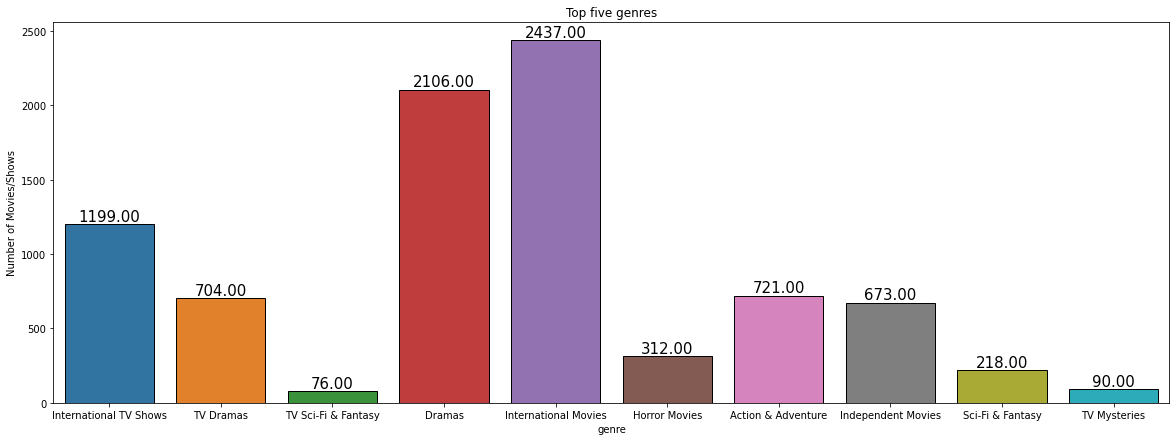

In [77]:
# Top 10 genres
plt.figure(figsize=(20,7))


plots=sns.barplot(x=genre_df['genre'][:10],y=genre_df['Number of Movies/Shows'][:10],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.title('Top five genres')
    

##### 1. Why did you pick the specific chart?

We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

From above graphs we can infer that 'International Movies' genre is most popular in movies and shows followed by Dramas.Where as Movies or shows with Standup comedy and talks and TV thrillers are least famous.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 3 (let's check top directors)*

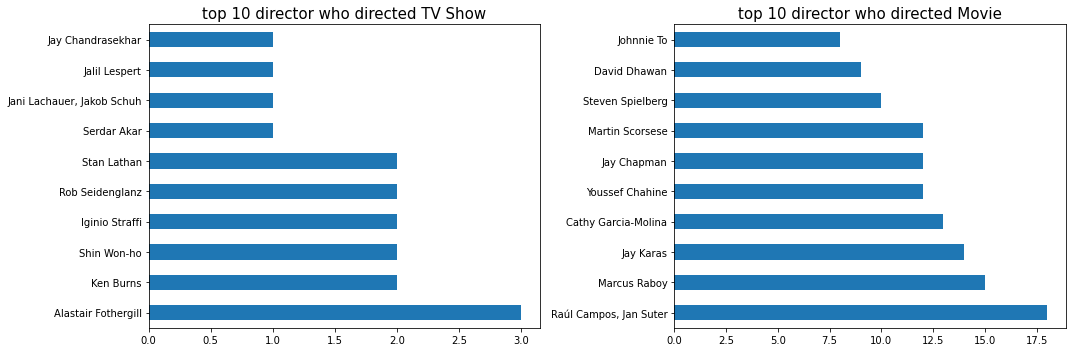

In [78]:
# Top directors for TV shows
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 director who directed TV show
show = netflix[netflix['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = netflix[netflix['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts are useful to compare different categorical or discrete variables.With the help of above charts we can get to know top directors from movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we got to know that Alastair Fothergill has directed most of the TV Shows while Raul Campos and Jan Suter are most famous in terms of movie directors.

#### Chart - 3 (Famous cast from TV shows and movies)*

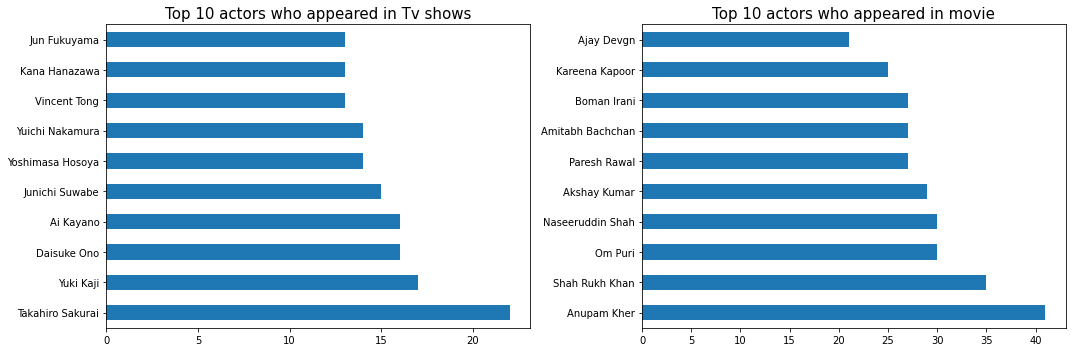

In [79]:
# Top directors for TV shows
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor 
TV_shows = netflix[netflix['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor 
movies = netflix[netflix['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts are useful to compare different categorical or discrete variables.With the help of above charts we can get to know top directors from movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot we got to know that Alastair Fothergill has directed most of the TV Shows while Raul Campos and Jan Suter are most famous in terms of movie directors.

#### Chart - 6(Top 10 countries with most contents)*

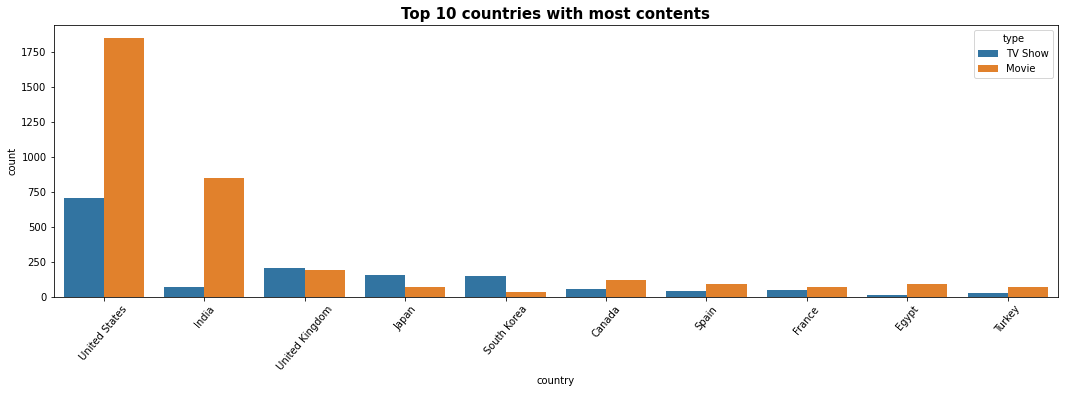

In [80]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=netflix['country'],order=netflix['country'].value_counts().index[0:10],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted above plot to check which country is top content producer.

##### 2. What is/are the insight(s) found from the chart?

We can infer that US and India produces highest amount of content which is added on netflix.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

#### Chart - 6(Checking duration of movies and TV shows)*

In [81]:
netflix['duration'] = netflix['duration'].apply(lambda x: x.split(' ')[0])

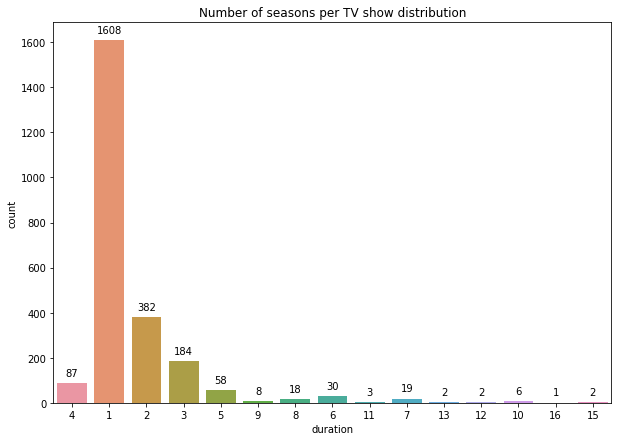

In [82]:
# Seasons in each TV show
plt.figure(figsize=(10,7))

p = sns.countplot(x=netflix.duration[netflix['type'] == 'TV Show'],data=netflix[:10])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



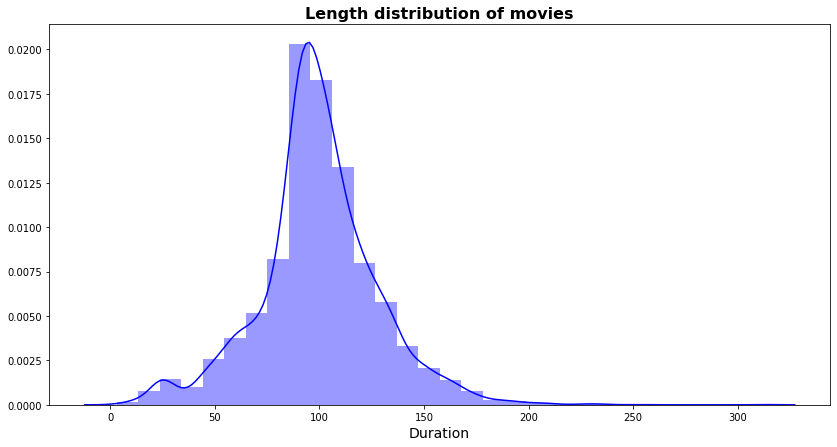

In [83]:
# Length distribution of movies
movie_df = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

#### Chart - 6(Monthwise content addition)*

In [84]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

Text(0.5, 1.0, 'daywise content addition')

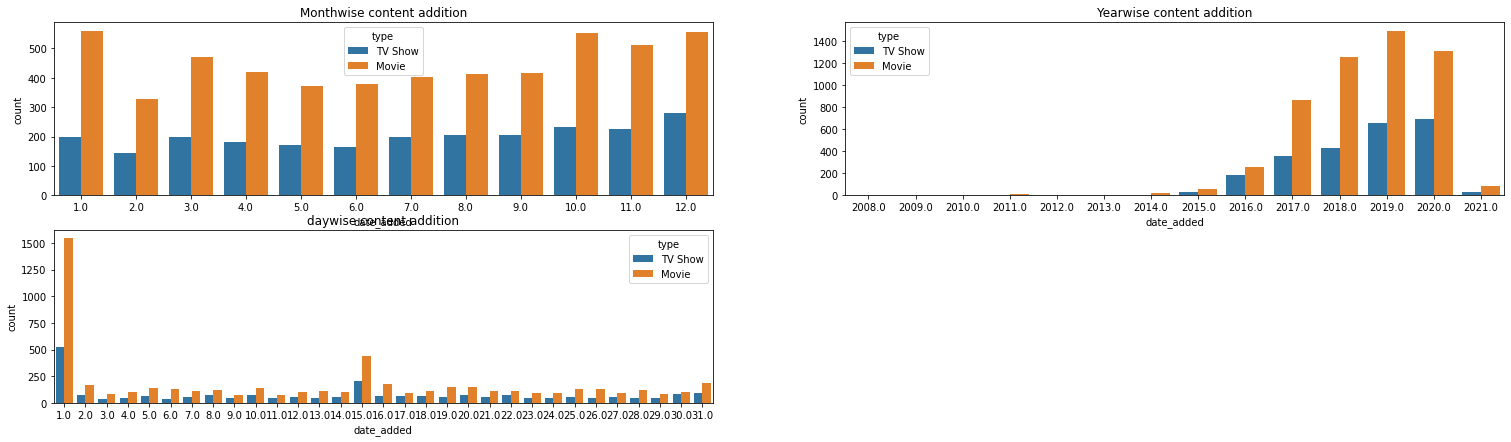

In [85]:
#Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(26,7))

plt.subplot(2,2,1)
sns.countplot(x=netflix['date_added'].dt.month,hue='type',data=netflix)
plt.title("Monthwise content addition")

plt.subplot(2,2,2)
sns.countplot(x=netflix['date_added'].dt.year,hue='type',data=netflix)
plt.title("Yearwise content addition")

plt.subplot(2,2,3)
sns.countplot(x=netflix['date_added'].dt.day,hue='type',data=netflix)
plt.title("daywise content addition")

##### 1. Why did you pick the specific chart?

We have plotted above plot to check which country is top content producer.

##### 2. What is/are the insight(s) found from the chart?

We can infer that US and India produces highest amount of content which is added on netflix.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [86]:
# Handling the missing values
netflix.fillna('Unknown',inplace=True)

In [87]:
#recheking null values after dealing
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all null values from our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [88]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

<Axes: >

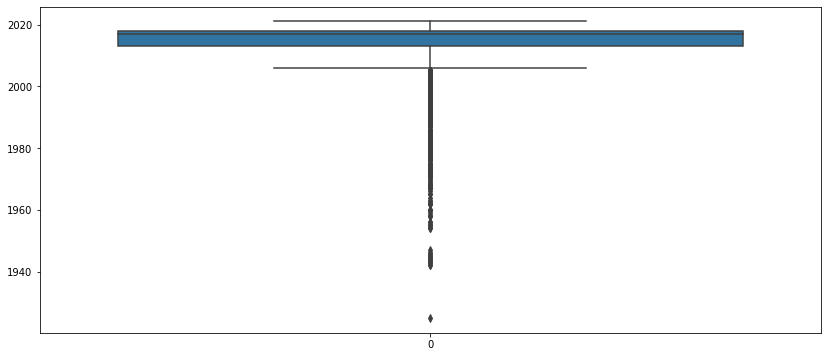

In [89]:
# Plotting box plot for release_year
sns.boxplot(netflix.release_year)

It is clear that we have outliers in most of the continous features but still we don't know the percentage of outliers in each of the feature. So, let's create a function that takes input as dataframe and list of continous feature and return the lower limit, upper limit,IQR, total outliers and percentage of outliers present in each continous feature.

In [90]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
detect_outliers(netflix['release_year'])

q1:2013.0, q2:2017.0, q3:2018.0
Lower bound: 2005.5, Upper bound: 2025.5, IQR: 5.0
Total number of outliers are: 745
Total percentage of outlier is: 9.57 %


##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Textual Data Preprocessing 

**Modeling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

#### 1. Expand Contraction

In [91]:
# Expand Contraction
# creating tag column using all text column which one is used for model building purpose.
netflix['tag'] = netflix['description'] + netflix['listed_in'] + netflix['rating'] + netflix['cast'] + netflix['country'] + netflix['director']

In [92]:
netflix.tag[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilUnknown'

We have successfully added all the necessary data into a single column

#### 2. Removing non-ASCII characters

In [93]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [94]:
# remove non-ascii characters
netflix['tag'] = remove_non_ascii(netflix['tag'])

In [95]:
netflix['tag'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazilUnknown'

#### 3. Removing stopwords and lower case

In [98]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [100]:
# Removing stop words
netflix['tag'] = netflix['tag'].apply(stopwords)

In [101]:
netflix['tag'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschibrazilunknown'

We have successfully removed all the stopwords and converted the corpus to lowercase.

#### 4. Removing Punctuation

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [102]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [103]:
# Removing punctuation marks
netflix['tag'] = netflix['tag'].apply(remove_punctuation)

In [104]:
netflix['tag'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

We have successfully dropped all the punctuation marks from the corpus.

#### 5. Stemming

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon" 

Used **SnowballStemmer** to generate a meaningful word out of corpus of words.

In [105]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [106]:
#performing stemming operation
netflix['tag'] = netflix['tag'].apply(stemming)

In [107]:
netflix['tag'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazilunknown'

#### 6. Text Vectorization.

Text Vectorization is the process of converting text into numerical representation

- We will  vectorized the corpus using **TFIDF vectorizer**, where TFIDF stands for **Term Frequency Inverse Document Frequency**.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [108]:
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(netflix['tag'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()  

In [109]:
print(array)
print(f'shape of the vector : {array.shape}')



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7787, 10000)


#### 7. Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible.

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [110]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

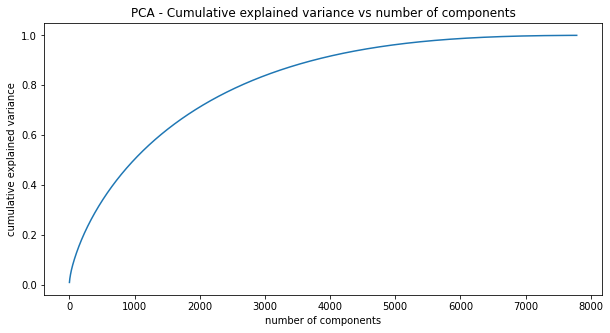

In [111]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~7600 components**.
* Also, more than **80%** of the variance is explained just by **4000 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance

In [112]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

PCA(n_components=4000, random_state=0)

In [113]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

(7787, 4000)

We have successfully reduced the dimensionality of data using PCA.

##  **Clusters implementation**

###  K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'Sum of squared errors')

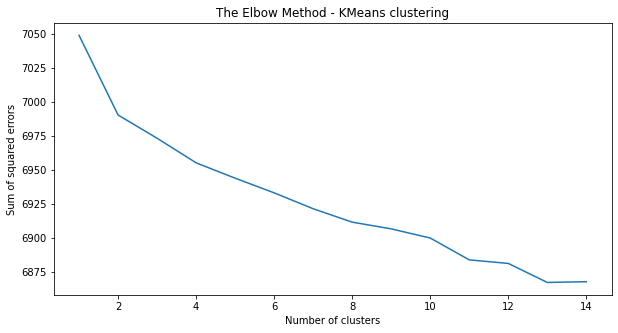

In [114]:
# Elbow method to find the optimal value of k
SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

- **The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.**

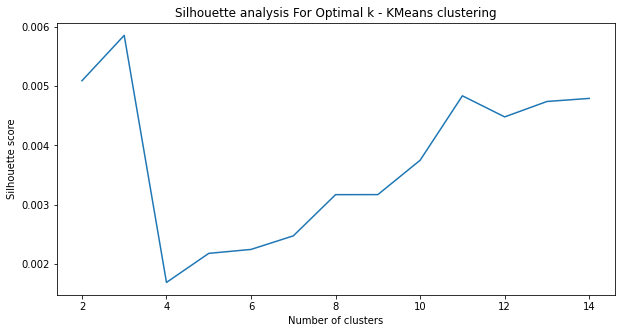

In [115]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* **The highest Silhouette score is obtained for 3 clusters.**

Building clusters using the k-means algorithm:

In [116]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [117]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6973.246648645826, 0.005859343439838985)


In [119]:
# Adding a kmeans cluster number attribute
netflix['kmeans_cluster'] = kmeans.labels_

In [120]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tag,kmeans_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...,2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...,2


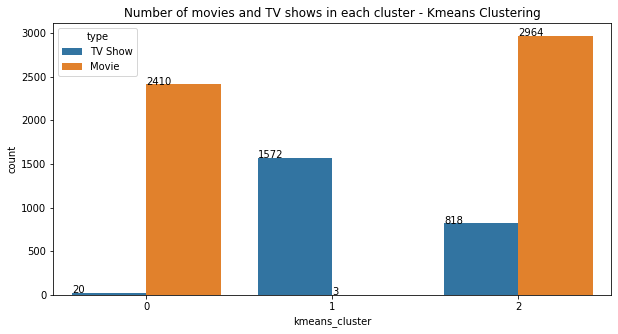

In [121]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 3 clusters using the k-means clustering algorithm.

###  Building wordclouds for different clusters built

In [122]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix[netflix['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

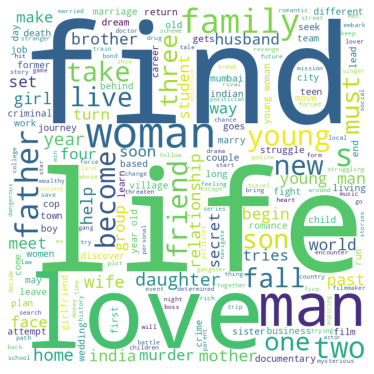

In [123]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

Keywords observed in cluster 0: love, find, family, life, woman, man

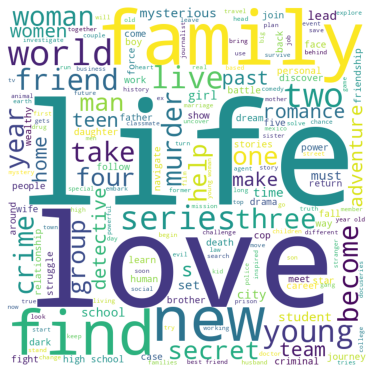

In [124]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

Keywords observed in cluster 1: life, love, family, word, find, new, young, three, series

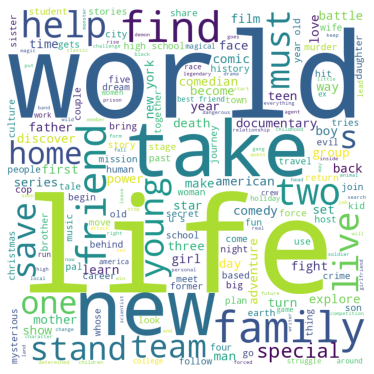

In [125]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

Keywords observed in cluster 2: life, new, find, world, family, take, stand,team,friend.

## 7.2. Hierarchical clustering

Building clusters using the agglomerative (hierarchical) clustering algorithm.
Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

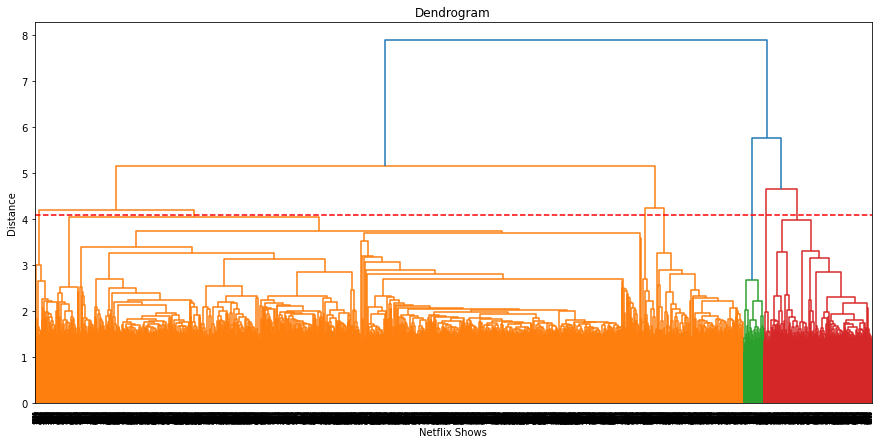

In [127]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

- **At a distance of 4.1 units, 8 clusters can be built using the agglomerative clustering algorithm.**

Building 8 clusters using the Agglomerative clustering algorithm:

In [128]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([0, 1, 0, ..., 1, 0, 1])

In [129]:
# Adding a hierarchical cluster number attribute
netflix['hierarchical_cluster'] = hierarchical.labels_

In [130]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tag,kmeans_cluster,hierarchical_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,1,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...,0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...,2,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...,2,1


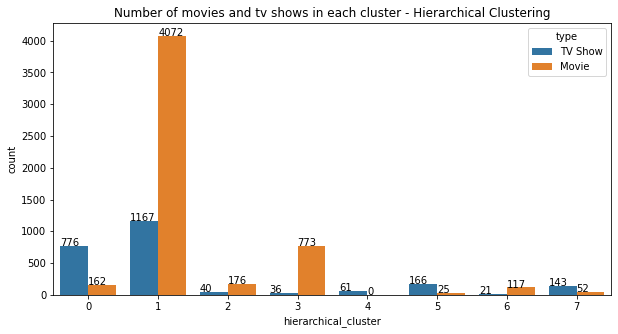

In [131]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- **Successfully built 8 clusters using the Agglomerative (hierarchical) clustering algorithm.**

### **7.2.1. Building wordclouds for different clusters built:**

In [132]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix[netflix['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

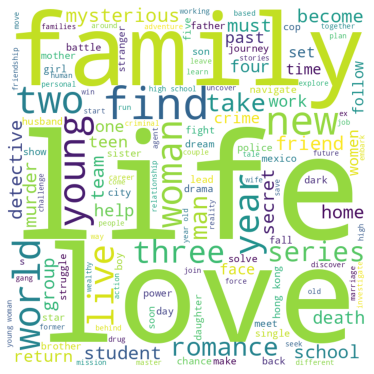

In [133]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in cluster 0: find, life, family, new, take, friend, become, love, live**

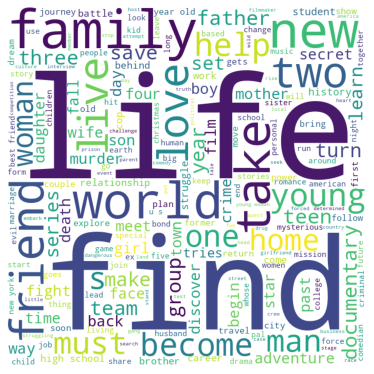

In [134]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, world, find, friend, young, must, crime**

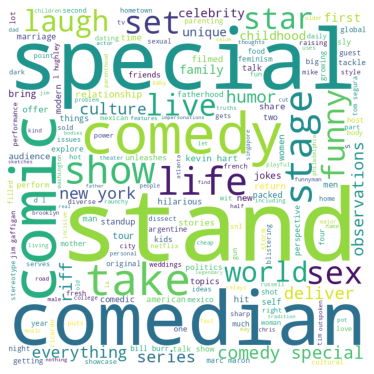

In [135]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in cluster 2: special,comedy,stand,comedian,comic,show,life**

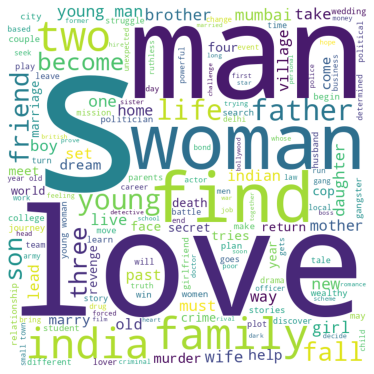

In [136]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in cluster 3: man,woman,find,love,india,family,father**

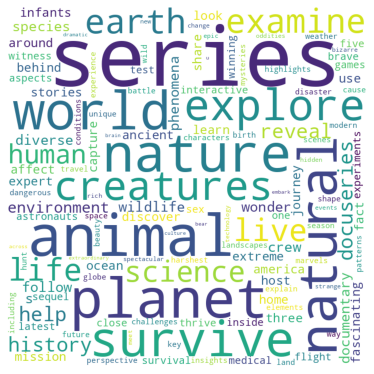

In [137]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in cluster 4: natural,series,nature,survive,planet,explore,creatures,animal,earth,world**

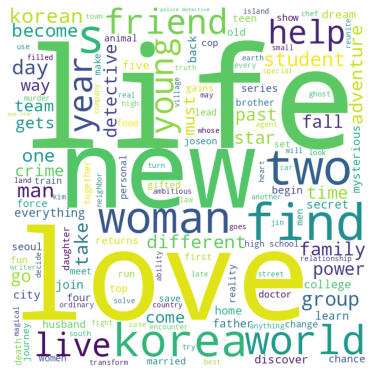

In [138]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in cluster 5: life,love,new,korea,world,find,woman,two**

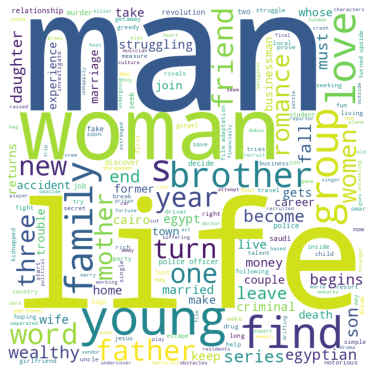

In [139]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6: young, man,woman,life,find,love**

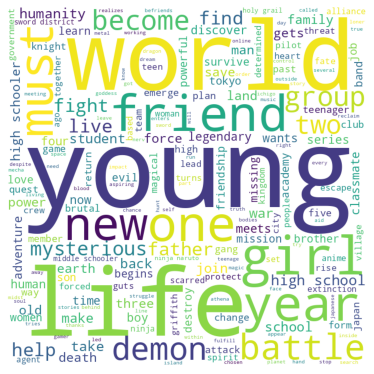

In [140]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Keywords observed in cluster 6: young, world,life,girl,year,battle,new,one,friend**

# **8. Content based recommender system:**

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

In [141]:
# veryfying index
netflix[['show_id', 'title', 'tag']]

,show_id,title,tag
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7782,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7783,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7785,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next willi w...


- As you can see above dataframe there are total 7787 rows present in our dataframe.



In [142]:
# defining a new df for building a recommender system
recommender_df = netflix.copy()

In [144]:
# reseting index
recommender_df.reset_index(inplace=True)

# checking reset index 
recommender_df[['show_id', 'title', 'tag']]

,show_id,title,tag
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7782,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7783,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7785,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next willi w...


- We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [145]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [146]:
# calling out transformed array after performing PCA for dimenssionality reduction.
X

array([[ 1.64083288e-01, -1.35436695e-02, -8.53756878e-03, ...,
         3.94276801e-06,  5.23698196e-03, -6.64304757e-03],
       [-4.38256214e-02,  7.64500107e-03, -1.26755005e-02, ...,
         5.44430181e-03, -2.31426121e-03, -6.64702594e-03],
       [-4.25179059e-02,  3.18263747e-02,  4.68545092e-02, ...,
        -6.33633469e-03, -9.37649462e-04,  8.32506358e-04],
       ...,
       [-7.31994789e-02,  3.33588714e-02, -5.66534644e-02, ...,
         6.28331061e-03, -4.52032637e-03, -9.25913106e-04],
       [ 6.92924876e-02, -3.83612746e-02, -3.62584469e-02, ...,
         2.17513817e-03,  8.64031141e-03,  3.92045707e-03],
       [-6.87231320e-02, -6.49786683e-02, -4.35115718e-02, ...,
        -4.78009372e-03, -8.88827642e-04,  2.37424963e-03]])

In [147]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08076686,  0.01868597, ..., -0.01988176,
         0.00771229, -0.01501535],
       [ 0.08076686,  1.        , -0.0017684 , ...,  0.06866495,
        -0.00654593, -0.00693622],
       [ 0.01868597, -0.0017684 ,  1.        , ...,  0.00274202,
        -0.00705925, -0.01122159],
       ...,
       [-0.01988176,  0.06866495,  0.00274202, ...,  1.        ,
        -0.0101832 ,  0.05426507],
       [ 0.00771229, -0.00654593, -0.00705925, ..., -0.0101832 ,
         1.        ,  0.04423682],
       [-0.01501535, -0.00693622, -0.01122159, ...,  0.05426507,
         0.04423682,  1.        ]])

#### **Function for list down top 10 recommended movie on the basis of cosine similarity score.**

In [148]:
def recommend(movie):
  try:
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    # Empty list
    recommend_content = []   
    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]
    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    # printing Statement
    print(f"If you liked '{movie}', you may also enjoy: \n")
    # listing top ten recommenaded movie
    for i in distances[1:11]:
      recommend_content.append(netflix.iloc[i[0]].title)
    return recommend_content
  except:
     return 'Invalid Entry'

In [149]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 



['Naruto Shippûden the Movie: Bonds',
 'Naruto Shippuden : Blood Prison',
 'Naruto Shippuden: The Movie',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto Shippuden: The Movie: The Lost Tower',
 'Dino Girl Gauko',
 'DRIFTING DRAGONS',
 'Marvel Anime: Wolverine']

In [150]:
recommend('A Man Called God')

If you liked 'A Man Called God', you may also enjoy: 



['Illang: The Wolf Brigade',
 'The Sound of Your Heart',
 'Can We Get Married?',
 'Hospital Playlist',
 'Mr. Sunshine',
 'Rugal',
 'Second 20s',
 'Seoul Searching',
 'Tune in for Love',
 'Secret Affair']

In [151]:
recommend('Avenger')

'Invalid Entry'

In [152]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 



['Bhool Bhulaiyaa',
 'Thank You',
 'Golmaal: Fun Unlimited',
 'Bhagam Bhag',
 'Chup Chup Ke',
 'Ready',
 'Khushi',
 'Hasee Toh Phasee',
 'Hattrick',
 'Fiza']

# **Conclusion**

## Conclusions drawn from EDA

## Conclusions drawn from ML Model 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***